# LogReg WOW 0.3 vs Miranda Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, cv2
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

#Miranda dataset
train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_train_70000.csv"
test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_test_70000.csv"

TensorFlow version: 2.3.0
Eager execution: True


In [3]:
#%% Importing the dataset
MirandaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity']
trainDataset = pd.read_csv(train_dataset_url)
MirandaX_train = trainDataset.iloc[:, :-1].values
MirandaY_train = trainDataset.iloc[:, -1].values

testDataset = pd.read_csv(test_dataset_url)
MirandaX_test = testDataset.iloc[:, :-1].values
MirandaY_test = testDataset.iloc[:, -1].values

In [4]:
MirandaX_train

array([[1.502380e+01, 2.910000e+00, 2.747740e+02, ..., 1.604439e+02,
        1.477400e-01, 8.579000e-01],
       [2.801000e+00, 9.223200e-01, 2.357319e+02, ..., 1.453054e+02,
        1.200900e-01, 1.298700e+00],
       [3.988500e+00, 8.873200e-01, 1.745089e+02, ..., 1.826219e+02,
        2.003400e-01, 1.596500e+00],
       ...,
       [7.551800e+00, 2.032900e+00, 2.796423e+02, ..., 1.376493e+02,
        9.355000e-01, 1.760300e+00],
       [3.402200e+01, 4.804000e+00, 4.167042e+02, ..., 1.391423e+02,
        9.767900e-01, 1.521500e+00],
       [2.003410e+01, 3.686400e+00, 4.570151e+02, ..., 8.242910e+01,
        9.437100e-01, 1.696200e+00]])

In [5]:
#%% Feature Scaling
from sklearn.preprocessing import StandardScaler

In [6]:
MirandaLabels

['Kurtosis',
 'Skewness',
 'Std',
 'Range',
 'Median',
 'Geometric_Mean',
 'Mobility',
 'Complexity']

## Getting x and y

In [7]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]
folder="../../../Dataset/Mono/MonoSamples/WOW_5" 
images=os.listdir(folder)
random.shuffle(images)
images=images
print(len(images))

40000


In [8]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i]))
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

52.15270256996155


### EDA

In [9]:
pd.DataFrame(GarciaY_train).describe()

,0
count,32000.000000
mean,0.499844
std,0.500008
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
pd.DataFrame(GarciaY_train).value_counts()

0    16005
1    15995
dtype: int64

In [11]:
GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
21370,12.332880,2.711079,94.824547,605.0,16.5,28.491772,25.943680,0.251105,4.351120
2470,15.553362,1.867483,51.841103,470.0,59.0,41.448215,38.847015,0.480690,2.399208
13767,1.550529,0.158143,49.470715,161.0,59.5,36.578472,35.711929,0.227990,7.565020
13316,40.711124,5.965194,243.238831,2000.0,0.0,30.951626,4.852769,0.307798,2.177935
26374,10.255503,2.684450,117.496376,577.0,4.0,50.930363,9.096652,0.162266,6.336588
...,...,...,...,...,...,...,...,...,...
20757,4.113600,1.179040,64.862350,317.0,62.5,58.150448,21.452852,0.293909,4.889634
32103,1.643840,0.041794,33.869118,132.0,66.0,53.249805,54.500492,0.333381,4.889300
30403,253.895050,15.900963,897.162415,14389.0,4.0,5.314681,5.142765,0.991233,1.003879
21243,6.502906,2.191926,137.122757,522.0,0.0,62.820034,4.494362,0.097151,14.183630


In [12]:
GarciaX_train.describe()

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,23.676948,2.916499,108.357526,846.077688,32.503281,52.121425,26.510676,0.324530,5.880958
std,48.184856,3.219961,96.806939,1517.507151,20.975978,449.704549,14.625834,0.214717,3.015110
min,1.224067,-1.219257,15.969453,90.000000,0.000000,1.776100,1.038634,0.086105,0.907459
25%,3.186822,1.027042,58.545888,250.000000,14.000000,27.506303,14.511355,0.185912,3.518788
50%,6.370928,1.888912,81.304432,394.000000,33.000000,37.303061,25.274077,0.253831,5.590275
75%,16.796350,3.414109,120.133553,742.000000,49.500000,46.451291,37.502126,0.376772,7.940934
max,254.003906,15.906097,1021.998047,16384.000000,86.500000,16384.000000,63.271149,1.419760,16.286221


##### Dataset looks homogeneous

In [13]:
trainDataset.iloc[:,:-2]

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility
0,15.0238,2.91000,274.7740,1789,228.0,160.4439,0.147740
1,2.8010,0.92232,235.7319,917,179.0,145.3054,0.120090
2,3.9885,0.88732,174.5089,817,260.0,182.6219,0.200340
3,5.4531,1.83640,343.9752,1336,69.5,120.5608,0.083738
4,15.8010,3.38050,443.4495,2785,118.0,113.9388,0.231590
...,...,...,...,...,...,...,...
55994,5.0543,1.22740,172.0252,981,238.0,205.0903,0.945960
55995,89.9023,8.30370,614.5032,7673,122.5,100.0387,0.988840
55996,7.5518,2.03290,279.6423,1520,156.0,137.6493,0.935500
55997,34.0220,4.80400,416.7042,3971,116.5,139.1423,0.976790


In [14]:
trainDataset.iloc[:,:-2].describe()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,23.861412,3.041558,367.443301,2756.949963,148.467740,137.751112,0.448144
std,43.134687,2.957414,249.044479,3567.278219,72.227963,69.236967,0.301130
min,1.137900,-1.540400,59.884100,338.000000,0.000000,4.826700,0.048408
25%,4.010750,1.235150,221.245700,1055.000000,96.000000,99.458600,0.183990
50%,7.952900,2.123400,299.071500,1646.000000,156.000000,138.097000,0.384070
75%,19.820800,3.644250,427.831850,2924.000000,203.000000,174.089600,0.723175
max,253.942400,15.903200,3624.730400,58017.000000,358.000000,3488.397300,1.408100


#### Standard scalling

In [15]:
scG=StandardScaler()
sc_GarciaX_train=pd.DataFrame(scG.fit_transform(GarciaX_train),columns=GarciaLabels)
sc_GarciaX_test=pd.DataFrame(scG.transform(GarciaX_test),columns=GarciaLabels)

scM=StandardScaler()
sc_MirandaX_train=pd.DataFrame(scM.fit_transform(MirandaX_train),columns=MirandaLabels)
sc_MirandaX_test=pd.DataFrame(scM.transform(MirandaX_test),columns=MirandaLabels)

#### Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEG = LogisticRegression()
rfe = RFE(logregRFEG, n_features_to_select=1)
rfe = rfe.fit(sc_GarciaX_train,GarciaY_train)
print(rfe.ranking_)
print("García's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=GarciaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[3 9 2 1 6 5 8 4 7]
García's Dataset
Ordered from most to less desired variables:


['Range',
 'Std',
 'Kurtosis',
 'Mobility',
 'Garcia_Gmean',
 'Median',
 'Complexity',
 'Epsilon_Gmean',
 'Skewness']

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEM = LogisticRegression()
rfe = RFE(logregRFEM, n_features_to_select=1)
rfe = rfe.fit(sc_MirandaX_train,MirandaY_train)
print(rfe.ranking_)
print("Miranda's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=MirandaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[4 3 5 6 7 8 2 1]
Miranda's Dataset
Ordered from most to less desired variables:


['Complexity',
 'Mobility',
 'Skewness',
 'Kurtosis',
 'Std',
 'Range',
 'Median',
 'Geometric_Mean']

RFE Shows prefferences for the variables to be predictors, meaning it to be ordered depending on de predictor-likability of a variable. Proving the anterior analysis, 

### Modelling

In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(MirandaY_train,sc_MirandaX_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.264509
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.618     
Dependent Variable: y                AIC:              29640.4288
Date:               2021-09-02 09:21 BIC:              29711.8935
No. Observations:   55999            Log-Likelihood:   -14812.   
Df Model:           7                LL-Null:          -38816.   
Df Residuals:       55991            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Kurtosis         -0.7686   0.0737 -10.4343 0.0000 -0.9129 -0.6242
Skewness          1.0767   0.0673  15.9897 0.0000  0.9447  1.2087


In [19]:
sc_GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
0,-0.235432,-0.063797,-0.139796,-0.158867,-0.762946,-0.052546,-0.038767,-0.341966,-0.507399
1,-0.168595,-0.325790,-0.583815,-0.247830,1.263213,-0.023734,0.843475,0.727295,-1.154785
2,-0.459206,-0.856656,-0.608301,-0.451456,1.287050,-0.034563,0.629119,-0.449624,0.558549
3,0.353523,0.946826,1.393324,0.760418,-1.549572,-0.047076,-1.480821,-0.077929,-1.228174
4,-0.278545,-0.072067,0.094404,-0.177318,-1.358875,-0.002649,-1.190653,-0.755724,0.151118
...,...,...,...,...,...,...,...,...,...
31995,-0.406013,-0.539599,-0.449305,-0.348655,1.430073,0.013407,-0.345820,-0.142612,-0.328791
31996,-0.457269,-0.892790,-0.769465,-0.470567,1.596933,0.002509,1.913754,0.041223,-0.328901
31997,4.777885,4.032554,8.148354,8.924593,-1.358875,-0.104085,-1.460993,3.105081,-1.617571
31998,-0.356425,-0.225029,0.297145,-0.213563,-1.549572,0.023791,-1.505327,-1.058987,2.753731


In [20]:
import statsmodels.api as sm
logit_modelG=sm.Logit(GarciaY_train,sc_GarciaX_train)
result=logit_modelG.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692855
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: y                AIC:              44360.7146
Date:               2021-09-02 09:21 BIC:              44436.0761
No. Observations:   32000            Log-Likelihood:   -22171.   
Df Model:           8                LL-Null:          -22181.   
Df Residuals:       31991            LLR p-value:      0.016538  
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
------------------------------------------------------------------
Kurtosis        0.0494    0.0745   0.6638  0.5068  -0.0965  0.1954
Skewness       -0.0070    0.0669  -0.1041  0.9171  -0.1381  0.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(newX), y, test_size=0.2, random_state=0)
logregMiranda = LogisticRegression()
logregMiranda.fit(sc_MirandaX_train, MirandaY_train)
y_predMiranda = logregMiranda.predict(sc_MirandaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregMiranda.score(sc_MirandaX_test, MirandaY_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [22]:
logregGarcia = LogisticRegression()
logregGarcia.fit(sc_GarciaX_train, GarciaY_train)
y_predGarcia = logregGarcia.predict(sc_GarciaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregGarcia.score(sc_GarciaX_test, GarciaY_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [23]:
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
import copy
def best_subset_cv(estimator, X, Y, labels,cv=3):
    n_features = X.shape[1]
    subsets = chain.from_iterable([combinations(labels, k + 1) for k in range(n_features)])
    best_score = -np.inf
    best_subset = None
    for subset in subsets:
        estimatorCopy=copy.copy(estimator)
        score = cross_val_score(estimatorCopy, X.loc[:, list(subset)], Y, cv=cv).mean()
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score

In [24]:
logregBSM = LogisticRegression()
subM, scoM=best_subset_cv(logregBSM,sc_MirandaX_train,MirandaY_train,MirandaLabels)
print("Miranda")

Miranda


In [25]:
subM, scoM

(('Skewness', 'Geometric_Mean', 'Complexity'), 0.8934098557840381)

In [26]:
logregBSG = LogisticRegression()
subG, scoG=best_subset_cv(logregBSG,sc_GarciaX_train,GarciaY_train,GarciaLabels)
print("García")

García


In [27]:
subG, scoG

(('Range', 'Median', 'Epsilon_Gmean', 'Mobility'), 0.5089685576286925)

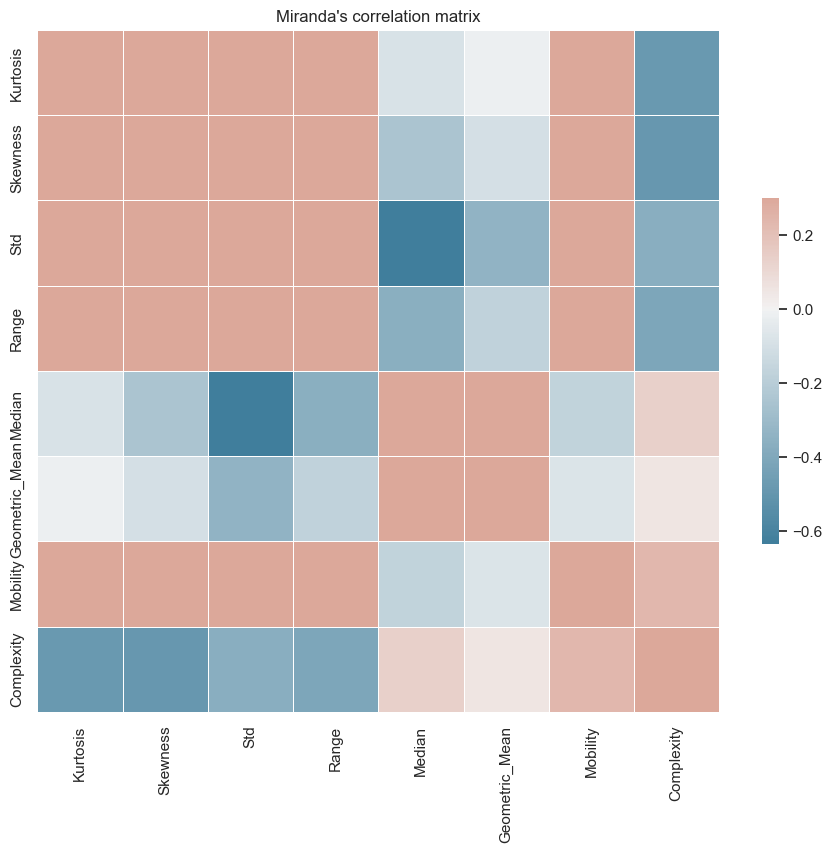

In [28]:
import seaborn as sns
sns.set_theme(style="dark")
corr = sc_MirandaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Miranda's correlation matrix")
plt.show()

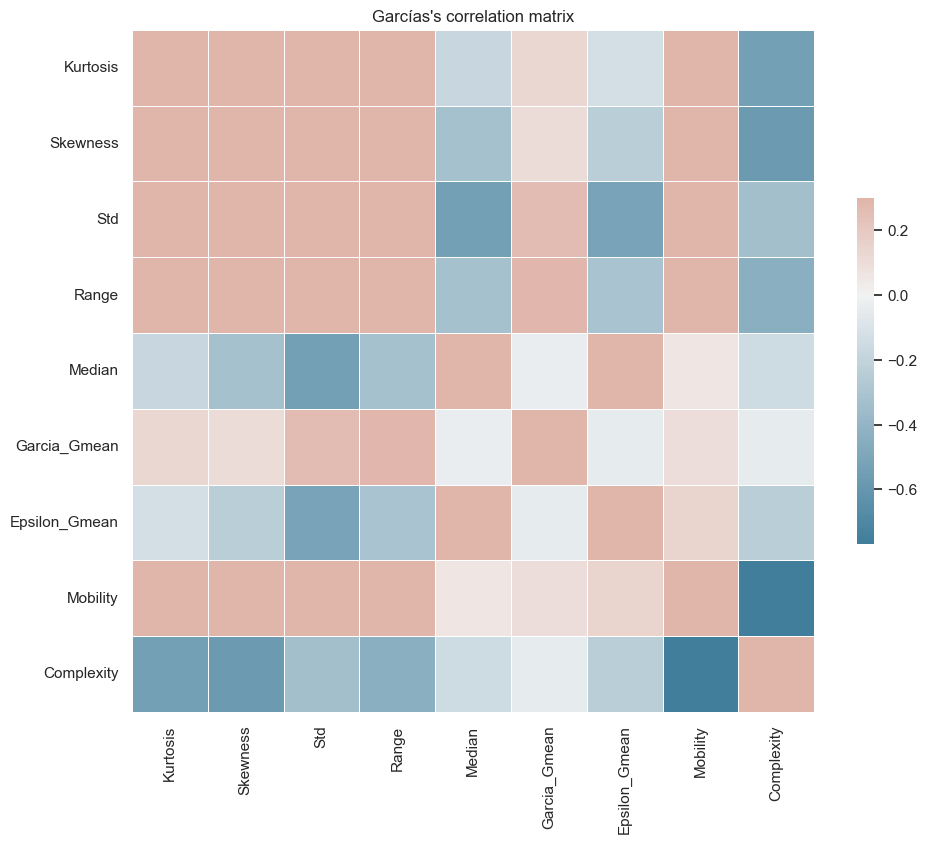

In [29]:
sns.set_theme(style="dark")
corr = sc_GarciaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcías's correlation matrix")
plt.show()